# Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## Imports<a id='3.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



## Load The Data<a id='3.4_Load_The_Data'></a>

In [27]:
bites = pd.read_csv('Health_AnimalBites.csv')

In [28]:
bites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [29]:
bites.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


## Explore The Data<a id='3.5_Explore_The_Data'></a>

#### What is the trend of animal bites from 1985 to 2017?

In [301]:
# Convert 'bite_date' to Timestamp
bites['bite_date'].sort_values(ascending=True)

0      1985-05-05
1      1986-02-12
2      1987-05-07
3      1988-10-02
4      1989-08-29
          ...    
8902          NaT
8924          NaT
8927          NaT
8928          NaT
8931          NaT
Name: bite_date, Length: 9003, dtype: datetime64[ns]

In [302]:
# Set the cell in row ??? for 'bite_date' to NaN to adjust for missing values
#bites.loc[8570, 'bite_date'] = np.nan

In [303]:
# Convert 'bite_date' to datetime
bites['bite_date'] = pd.to_datetime(bites['bite_date'])

# Now, the 'bite_date' column is of datetime data type
print(bites['bite_date'].dtype)

datetime64[ns]


In [313]:
# Group by the month and count observations
grouped_data = bites.groupby(bites['bite_date'].dt.to_period('M')).size().reset_index(name='n_incidents')

# Create a month date object with '2018' as the year
grouped_data['month'] = grouped_data['bite_date'].dt.to_timestamp() + pd.offsets.MonthBegin()

# Select only 'month' and 'n_incidents' columns
month_data = grouped_data[['month', 'n_incidents']]

print(month_data.head())

       month  n_incidents
0 1985-06-01            1
1 1986-03-01            1
2 1987-06-01            1
3 1988-11-01            1
4 1989-09-01            1


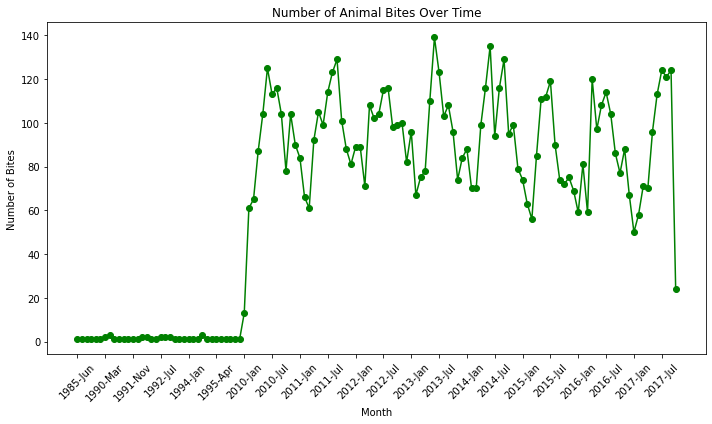

In [310]:
# Create a line plot for the timeline
plt.figure(figsize=(10, 6))
plt.plot(month_data['month'], month_data['n_incidents'], marker='o', linestyle='-', color='green')
plt.title('Number of Animal Bites Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45)  

# Customize the number of ticks and labels on the x-axis
plt.xticks(range(0, len(month_data), 6), month_data['month'][::6], rotation=45)


# Display the plot
plt.tight_layout()
plt.show()

#### What aninal is responsible for the most bites from 1985 to 2017?

In [348]:
grouped = bites.groupby('SpeciesIDDesc')['bite_date'].count().sort_values(ascending=False).reset_index()

In [349]:
# Rename the columns to make the output more descriptive
grouped.columns = ['SpeciesIDDesc', 'Count']
grouped

,SpeciesIDDesc,Count
0,DOG,6925
1,CAT,1532
2,BAT,76
3,RACCOON,21
4,OTHER,8
5,HORSE,5
6,FERRET,4
7,RABBIT,3
8,SKUNK,1


In [342]:
import plotly.express as px

In [363]:
# Define a custom color scale
fig = px.treemap(grouped, path=['SpeciesIDDesc'], values='Count')
# Set the title for the treemap
fig.update_layout(title_text="What animal is responsible for most bites?")
fig.show()

#### So dogs represent the animal that bites humans the most. Which breed?

In [213]:
bites['BreedIDDesc'].unique()

array([nan, 'GERM SHEPHERD', 'DACHSHUND', 'PIT BULL', 'SHIH TZU',
       'COCKER SPAINEL', 'CHICHAUHUA', 'BEAGLE', 'CHOW CHOW', 'OTHER',
       'BOXER', 'AAUST. TERR.', 'GOLD RETRIEVER', 'LABRADOR RETRIV',
       'BULLMASTIFF', 'BORDER COLLIE', 'POMERANIAN', 'YORKSHIRE TERRIER',
       'GREYHOUND', 'ROTTWEILER', 'AMER. BULL DOG', 'DALMATIAN', 'HUSKY',
       'BULL DOG', 'MASTIF', 'GREAT PYRENEESE', 'GREAT DANE', 'POODLE',
       'SIBERAN HUSKY', 'WEIMARANER', 'CORGI', 'BOSTON TERRIER',
       'SCHNAUZER', 'BASSET HOUND', 'MIN PIN', 'WELSH CORGI',
       'AM BULLDOG', 'SAMOYED', 'MALTASE', 'AKITA', 'SHELTIE',
       'LHASA APSO', 'SAINT BERNARD', 'AIREDALE TER.', 'AM. ESKIMO',
       'BICHON FRISE', 'PUG', 'DOBERMAN', 'DOTSON', 'NEW FOUNDLAND',
       'BERNESEN MT.', 'HAVANESE', 'ENGLISH SETTER', 'SHAR-PEI',
       'COCKAPOO', 'OLD ENG SHP DOG', 'WESTIE', 'BOUVIER', 'RAT TERRIER',
       'SHEEP DOG', 'HEELER', 'PEKINGESE', 'FOX TERRIER MIX',
       'ENGLISH BULLDOG', 'BORDER COLLIE M', 

In [212]:
bites['BreedIDDesc'].nunique()

101

In [31]:
# Filter the DataFrame to include only 'Dogs' in 'SpeciesIDDesc'
dog_df = bites[bites['SpeciesIDDesc'] == 'DOG']

In [32]:
# Group by 'BreedIDDesc' and count the occurrences
breed_counts = dog_df['BreedIDDesc'].value_counts().reset_index()

In [33]:
# Rename the columns to make the output more descriptive
breed_counts.columns = ['BreedIDDesc', 'Count']

In [91]:
# Print the result for top 20
breed_counts.head(20)

,BreedIDDesc,Count
0,PIT BULL,1101
1,GERM SHEPHERD,327
2,LABRADOR RETRIV,253
3,BOXER,181
4,CHICHAUHUA,165
5,SHIH TZU,119
6,BEAGLE,115
7,ROTTWEILER,86
8,AAUST. TERR.,78
9,DACHSHUND,67


In [337]:
# Sort the data in descending order
sorted_data = sorted(zip(breed_counts['BreedIDDesc'], breed_counts['Count']), key=lambda x: x[1], reverse=True)

# Extract the top 10 breeds with most counts
top_categories = [category for category, value in sorted_data[:10]]
top_values = [value for category, value in sorted_data[:10]]

# Calculate the sum of the rest of the values
other = 'OTHER BREEDS'
other_value = sum(value for category, value in sorted_data[10:])

# Append the "Other" category to the top categories
top_categories.append(other)
top_values.append(other_value)

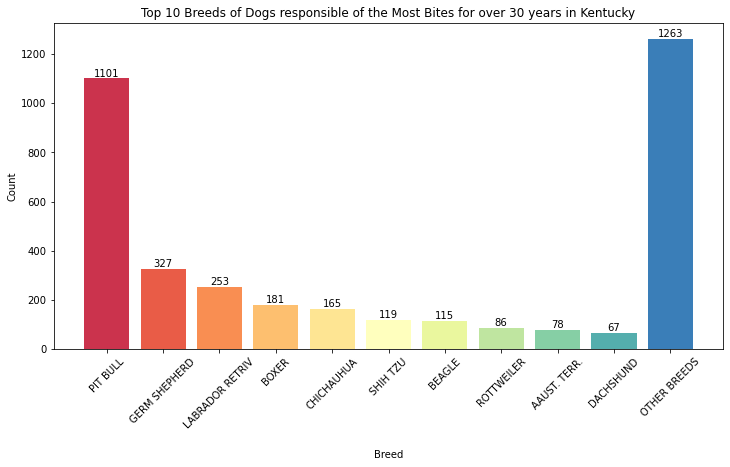

In [340]:
# Select a ColorBrewer palette (e.g., 'Set1' with 8 distinct colors)
palette = sns.color_palette("Spectral", 11)

plt.figure(figsize=(12, 6))

plt.bar(top_categories, top_values, color=palette)
plt.xlabel('Breed', labelpad=20)
plt.ylabel('Count')
plt.title('Top 10 Breeds of Dogs responsible of the Most Bites for over 30 years in Kentucky')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add values to each bar
for i, value in enumerate(top_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

#### What part of the body do animals and more specifically dogs target?

In [128]:
bites['WhereBittenIDDesc'].unique()

array(['BODY', 'HEAD', nan, 'UNKNOWN'], dtype=object)

In [129]:
bites['WhereBittenIDDesc'].value_counts()

BODY       6213
HEAD       1244
UNKNOWN     930
Name: WhereBittenIDDesc, dtype: int64

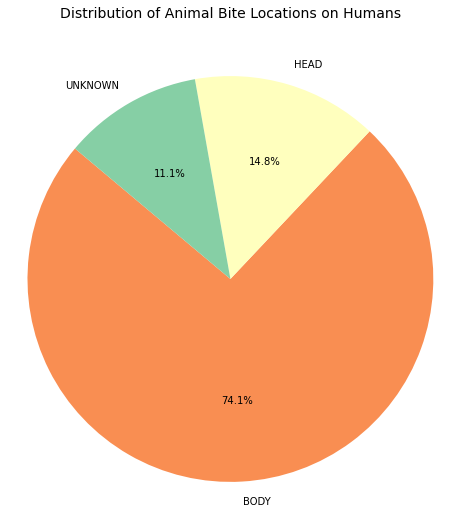

In [328]:
# Calculate value counts for 'WhereBittenIDDesc'
value_counts = bites['WhereBittenIDDesc'].value_counts()

palette = sns.color_palette("Spectral", 3)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
title_text = 'Distribution of Animal Bite Locations on Humans'
plt.text(0.5, 1.1, title_text, horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [131]:
# Group by 'WhereBittenIDDesc' and count the occurrences
partbody_counts = dog_df['WhereBittenIDDesc'].value_counts().reset_index()

In [132]:
# Rename the columns to make the output more descriptive
partbody_counts.columns = ['WhereBittenIDDesc', 'Count']

In [134]:
# Print the result 
partbody_counts.head()

,WhereBittenIDDesc,Count
0,BODY,4909
1,HEAD,1184
2,UNKNOWN,637


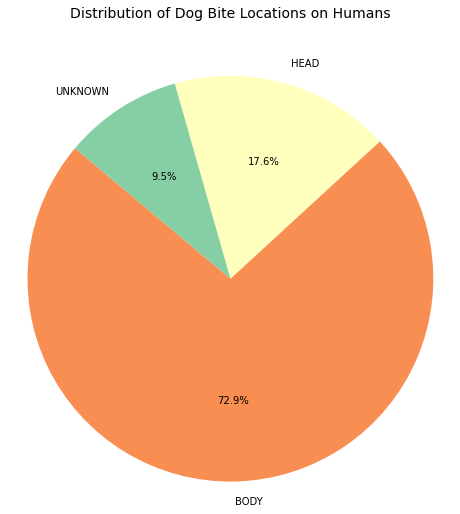

In [329]:
# Calculate value counts for 'WhereBittenIDDesc'
value_counts_dogs = dog_df['WhereBittenIDDesc'].value_counts()

palette = sns.color_palette("Spectral", 3)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts_dogs, labels=value_counts_dogs.index, autopct='%1.1f%%', startangle=140, colors=palette)
title_text = 'Distribution of Dog Bite Locations on Humans'
plt.text(0.5, 1.1, title_text, horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

#### What about the animals that are not dogs, what part do they bite?

In [136]:
# Filter the DataFrame to include animals that are not 'Dogs' in 'SpeciesIDDesc'
not_dog_df = bites[bites['SpeciesIDDesc'] != 'DOG']

In [137]:
# Group by 'WhereBittenIDDesc' and count the occurrences
partbody_counts_not = not_dog_df['WhereBittenIDDesc'].value_counts().reset_index()

In [138]:
# Rename the columns to make the output more descriptive
partbody_counts_not.columns = ['WhereBittenIDDesc', 'Count']

In [139]:
# Print the result 
partbody_counts_not.head()

,WhereBittenIDDesc,Count
0,BODY,1304
1,UNKNOWN,293
2,HEAD,60


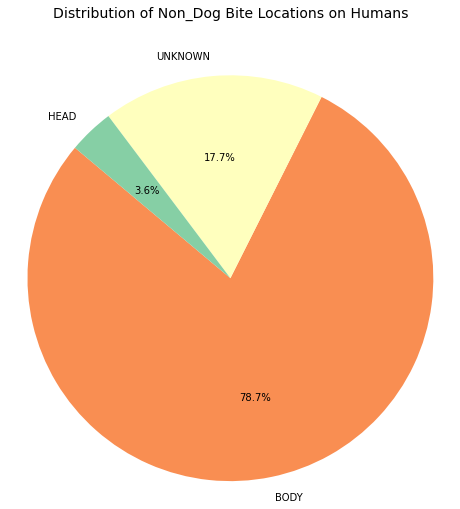

In [331]:
# Calculate value counts for 'WhereBittenIDDesc'
value_counts_not_dogs = not_dog_df['WhereBittenIDDesc'].value_counts()

palette = sns.color_palette("Spectral", 3)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts_not_dogs, labels=value_counts_not_dogs.index, autopct='%1.1f%%', startangle=140, colors=palette)
title_text = 'Distribution of Non_Dog Bite Locations on Humans'
plt.text(0.5, 1.1, title_text, horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

#### Which are more aggresive, male dogs or female dogs?

In [140]:
bites['GenderIDDesc'].unique()

array(['FEMALE', 'UNKNOWN', 'MALE', nan], dtype=object)

In [141]:
# Group by 'GenderIDDesc' and count the occurrences
gender_counts = dog_df['GenderIDDesc'].value_counts().reset_index()

In [143]:
# Rename the columns to make the output more descriptive
gender_counts.columns = ['Gender', 'Count']

In [144]:
# Print the result 
gender_counts.head()

,Gender,Count
0,MALE,3307
1,FEMALE,1601
2,UNKNOWN,464


#### How many of the dogs had rabies?

In [47]:
bites['ResultsIDDesc'].unique()

array(['UNKNOWN', 'NEGATIVE', nan, 'POSITIVE'], dtype=object)

In [130]:
bites['ResultsIDDesc'].value_counts()

UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64

In [94]:
# Filter the DataFrame for Dogs with ResultsIDDesc of 'Rabies'
rabies_dogs_pos = bites[(bites['SpeciesIDDesc'] == 'DOG') & (bites['ResultsIDDesc'] == 'POSITIVE')]
rabies_dogs_neg = bites[(bites['SpeciesIDDesc'] == 'DOG') & (bites['ResultsIDDesc'] == 'NEGATIVE')]
rabies_dogs_uk = bites[(bites['SpeciesIDDesc'] == 'DOG') & (bites['ResultsIDDesc'] == 'UNKNOWN')]

In [95]:
# Count the number of dogs with Rabies
rabies_dogs_pos_count = len(rabies_dogs_pos)
rabies_dogs_neg_count = len(rabies_dogs_neg)
rabies_dogs_uk_count = len(rabies_dogs_uk)

In [96]:
# Print the count
print(f"Number of Dogs with Rabies: {rabies_dogs_pos_count}")
print(f"Number of Dogs without Rabies: {rabies_dogs_neg_count}")
print(f"Number of Unknown results: {rabies_dogs_uk_count}")

Number of Dogs with Rabies: 1
Number of Dogs without Rabies: 58
Number of Unknown results: 979


#### How many of the dogs that had rabies where vaccinated?

In [377]:
rabies_dogs_pos_vac = bites[(bites['SpeciesIDDesc'] == 'DOG') & (bites['ResultsIDDesc'] == 'POSITIVE') & pd.notna(bites['vaccination_date'])]

In [378]:
rabies_dogs_pos_vac

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc


#### Many of the results are unknown. Could it be because the dogs are likely vaccinated against rabies?

In [364]:
# Filter the DataFrame for Dogs with vaccine for 'Rabies'
vac_dogs = bites[(bites['SpeciesIDDesc'] == 'DOG') & pd.notna(bites['vaccination_date'])] 
vac_dogs.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
6,1990-02-08,DOG,NaN,FEMALE,BLACK/WHIT,1.0,1990-02-13 00:00:00,40203,NO,BODY,1990-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
41,2009-12-02,DOG,NaN,MALE,TAN-BRN,1.0,2010-01-16 00:00:00,40291,NO,BODY,2009-12-03 00:00:00,RELEASED,NaN,NaN,UNKNOWN
44,2009-12-24,DOG,NaN,MALE,BRN-WHT,1.0,2009-04-30 00:00:00,40165,NO,HEAD,2009-12-28 00:00:00,RELEASED,NaN,NaN,UNKNOWN
47,2009-12-29,DOG,NaN,FEMALE,WHT-BRN,3.0,2008-06-07 00:00:00,40291,NO,BODY,2009-12-30 00:00:00,RELEASED,NaN,NaN,UNKNOWN


In [113]:
# Count the number of dogs with vaccine
vac_dogs_count = len(vac_dogs)

In [114]:
# Print the count
print(f"Number of Dogs with rabies vaccine is: {vac_dogs_count}")

Number of Dogs with rabies vaccine is: 3544


In [374]:
# Group by 'ResultsIDDesc' and 'vaccination_date' and count the records
result = vac_dogs.groupby(['ResultsIDDesc', 'vaccination_date']).size().reset_index(name='Count')

# Print the result
print(result)

    ResultsIDDesc     vaccination_date  Count
0        NEGATIVE  2011-10-13 00:00:00      1
1        NEGATIVE  2013-02-08 00:00:00      1
2        NEGATIVE  2014-04-01 00:00:00      1
3        NEGATIVE  2015-10-01 00:00:00      1
4        NEGATIVE  2017-02-04 00:00:00      1
..            ...                  ...    ...
360       UNKNOWN  2011-01-17 00:00:00      1
361       UNKNOWN  2011-01-28 00:00:00      1
362       UNKNOWN  2011-02-04 00:00:00      1
363       UNKNOWN  2011-02-10 00:00:00      1
364       UNKNOWN  2011-02-12 00:00:00      1

[365 rows x 3 columns]


In [372]:
# Group by 'ResultsIDDesc' and 'vaccination_date' and sum the values
groupby = result.groupby(['ResultsIDDesc'])['Count'].sum().reset_index()

# Print the result
print(groupby)

  ResultsIDDesc  Count
0      NEGATIVE      5
1       UNKNOWN    488


#### How many dogs with vaccine accounted for the people that didn't get tested?

In [121]:
# Filter the DataFrame for Dogs with vaccine for 'Rabies' and no test result
vac_dogs_notest = bites[(bites['SpeciesIDDesc'] == 'DOG') & pd.notna(bites['vaccination_date']) & ((bites['ResultsIDDesc'] == 'UNKNOWN') | pd.isna(bites['ResultsIDDesc']))] 

In [122]:
# Count the number of dogs with vaccine and not test results
vac_dogs_notest_count = len(vac_dogs_notest)

In [382]:
# Print the count
print(f"Number of Dogs with rabies vaccine and not tested: {vac_dogs_notest_count}")

Number of Dogs with rabies vaccine and not tested: 3539


#### How many of the dogs that had rabies where vaccinated?

In [381]:
rabies_dogs_pos_vac = bites[(bites['SpeciesIDDesc'] == 'DOG') & (bites['ResultsIDDesc'] == 'POSITIVE') & pd.notna(bites['vaccination_date'])]
rabies_dogs_pos_vac_count = len(rabies_dogs_pos_vac)
print(f"Number of Dogs with rabies with a vaccine: {rabies_dogs_pos_vac_count}")

Number of Dogs with rabies with a vaccine: 0


#### How many animals that are not dogs had rabies?

In [67]:
rabies_notdogs_pos = bites[(bites['SpeciesIDDesc'] != 'DOG') & (bites['ResultsIDDesc'] == 'POSITIVE')]
rabies_count_notdogs_pos = len(rabies_notdogs_pos)
print(f"Number of Animals that are not Dogs with Rabies: {rabies_count_notdogs_pos}")

Number of Animals that are not Dogs with Rabies: 3


#### What animal or animals were they?

In [74]:
grouped_rabies = rabies_notdogs_pos.groupby('SpeciesIDDesc')['ResultsIDDesc'].count().sort_values(ascending=False)
grouped_rabies

SpeciesIDDesc
BAT    3
Name: ResultsIDDesc, dtype: int64